# Setup

In [1]:
from scipy.constants import *
from operator import *
from numpy import *
from math import *

import pandas as pd
import seaborn as sns

print("Setup Complete")

Setup Complete


# Data

In [2]:
# Distances (measured in meters)
d = [i / 1000 for i in [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40 ]]

# 1st experiment - 10 volts
v1 = [ 10, 15, 20, 22, 24, 25, 26, 27, 27.5, 28, 30, 31, 32, 32.5 ]

# 2nd experiment - 15 volts
v2 = [ 15, 20, 25, 28, 30, 31, 32.5, 34, 35, 36, 37.5, 39, 39.5, 40 ]

# 3rd experiment - 20 volts
v3 = [ 20, 30, 40, 45, 47.5, 50, 52.5, 54.5, 56, 57.5, 59, 60, 60, 61 ]

df = pd.DataFrame({
    'distance': d,
    'voltage1': v1,
    'voltage2': v2,
    'voltage3': v3
})

display(df)

,distance,voltage1,voltage2,voltage3
0,0.001,10.0,15.0,20.0
1,0.002,15.0,20.0,30.0
2,0.003,20.0,25.0,40.0
3,0.004,22.0,28.0,45.0
4,0.005,24.0,30.0,47.5
5,0.006,25.0,31.0,50.0
6,0.007,26.0,32.5,52.5
7,0.008,27.0,34.0,54.5
8,0.009,27.5,35.0,56.0
9,0.010,28.0,36.0,57.5


# Plots

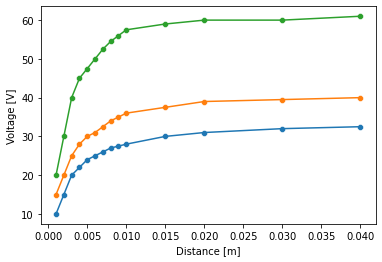

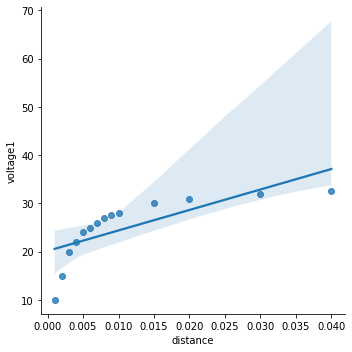

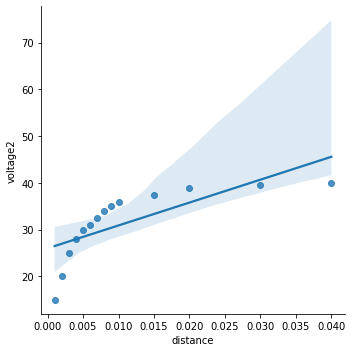

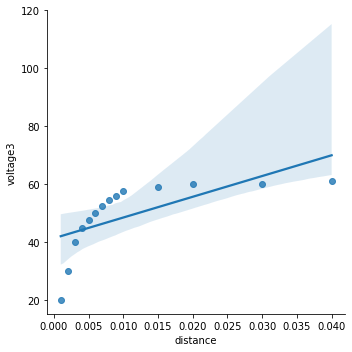

In [3]:
# Scatterplots

ax = sns.scatterplot(x='distance', y='voltage1', data=df)
sns.scatterplot(x='distance', y='voltage2', data=df)
sns.scatterplot(x='distance', y='voltage3', data=df)
ax.set(xlabel='Distance [m]', ylabel='Voltage [V]')

# Lineplots

ax = sns.lineplot(x='distance', y='voltage1', data=df)
sns.lineplot(x='distance', y='voltage2', data=df)
sns.lineplot(x='distance', y='voltage3', data=df)
ax.set(xlabel='Distance [m]', ylabel='Voltage [V]')

# LMplots

sns.lmplot(x="distance", y="voltage1", data=df)
sns.lmplot(x="distance", y="voltage2", data=df)
sns.lmplot(x="distance", y="voltage3", data=df)


# Data Analysis

In [4]:

# Apparatus
r = 0.1 
area = pi * r**2 

def analysis (d, v_exp):

    # Charge homogeneously distributed on the capacitor's plates (constant)
    # Measured in Coulomb (C)
    q =  (epsilon_0 * area * v_exp[0]) / d[0]

    # Voltage under the hypothesis of an infinite parallel plane capacitor
    # Measured in Volt (V) 
    v_inf = [ ( q * i / (epsilon_0 * area) ) for i in d ]

    # Capacitance under the hypothesis of an infinite parallel plane capacitor
    # Measured in Farad (F)
    c_inf = [ ( q / i ) for i in v_inf ]

    # Voltage along the axis of a flat disk
    # Measured in Volt (V) 
    v_disk = [ ( q * ( i + r - sqrt(r**2 + i**2)) / (epsilon_0 * area) ) for i in d ]

    # Capacitance under the hypothesis of an finite circular parallel plate capacitor (disk)
    # Measured in Farad (F)
    c_disk = [ ( q / i ) for i in v_disk ]

    # Total Capacitance of our capacitor (includes parasitic)
    # Measured in Volt (V) 
    c_tot = [ ( q / i ) for i in v_exp ] 

    # Parasitic capacitance from the voltmeter
    # It must be positive
    c_par = map(sub, c_tot, c_disk)
    c_par = [ *map(lambda x: max(x,0), c_par) ]

    # Display parasitic capacitance
    print(f"Parasitic capacitance has a mean value of {mean(c_par)} with a std. error of {std(c_par)}")

    # Create dataframe
    results = pd.DataFrame({
        'distance [m]': d,
        'voltage_inf [V]': v_inf,
        'voltage_disk [V]': v_disk,
        'voltage_exp [V]': v_exp,
        'capacitance_inf [F]': c_inf,
        'capacitance_disk [F]': c_disk,
        'capacitance_total [F]': c_tot,
        'capacitance_par [F]': c_par,
        #'charge [C]': q,
    })

    display(results) 

# 10 Volts

In [5]:
analysis(df['distance'], df['voltage1'])

Parasitic capacitance has a mean value of 5.994141716657975e-11 with a std. error of 1.9376964418567223e-11


,distance [m],voltage_inf [V],voltage_disk [V],voltage_exp [V],capacitance_inf [F],capacitance_disk [F],capacitance_total [F],capacitance_par [F]
0,0.001,10.0,9.950001,10.0,2.781625e-10,2.795603e-10,2.781625e-10,0.000000e+00
1,0.002,20.0,19.800020,15.0,1.390813e-10,1.404860e-10,1.854417e-10,4.495570e-11
2,0.003,30.0,29.550101,20.0,9.272084e-11,9.413251e-11,1.390813e-10,4.494875e-11
3,0.004,40.0,39.200320,22.0,6.954063e-11,7.095925e-11,1.264375e-10,5.547826e-11
4,0.005,50.0,48.750780,24.0,5.563250e-11,5.705806e-11,1.159010e-10,5.884298e-11
5,0.006,60.0,58.201617,25.0,4.636042e-11,4.779292e-11,1.112650e-10,6.347209e-11
6,0.007,70.0,67.552994,26.0,3.973750e-11,4.117693e-11,1.069856e-10,6.580865e-11
7,0.008,80.0,76.805104,27.0,3.477031e-11,3.621667e-11,1.030232e-10,6.680648e-11
8,0.009,90.0,85.958168,27.5,3.090695e-11,3.236022e-11,1.011500e-10,6.878979e-11
9,0.010,100.0,95.012438,28.0,2.781625e-11,2.927643e-11,9.934375e-11,7.006732e-11


# 15 Volts

In [6]:
analysis(df['distance'], df['voltage2'])

Parasitic capacitance has a mean value of 7.915748864846931e-11 with a std. error of 2.321662937251704e-11


,distance [m],voltage_inf [V],voltage_disk [V],voltage_exp [V],capacitance_inf [F],capacitance_disk [F],capacitance_total [F],capacitance_par [F]
0,0.001,15.0,14.925002,15.0,2.781625e-10,2.795603e-10,2.781625e-10,0.000000e+00
1,0.002,30.0,29.700030,20.0,1.390813e-10,1.404860e-10,2.086219e-10,6.813591e-11
2,0.003,45.0,44.325152,25.0,9.272084e-11,9.413251e-11,1.668975e-10,7.276500e-11
3,0.004,60.0,58.800480,28.0,6.954063e-11,7.095925e-11,1.490156e-10,7.805639e-11
4,0.005,75.0,73.126170,30.0,5.563250e-11,5.705806e-11,1.390813e-10,8.202319e-11
5,0.006,90.0,87.302426,31.0,4.636042e-11,4.779292e-11,1.345948e-10,8.680185e-11
6,0.007,105.0,101.329491,32.5,3.973750e-11,4.117693e-11,1.283827e-10,8.720577e-11
7,0.008,120.0,115.207656,34.0,3.477031e-11,3.621667e-11,1.227188e-10,8.650209e-11
8,0.009,135.0,128.937252,35.0,3.090695e-11,3.236022e-11,1.192125e-10,8.685229e-11
9,0.010,150.0,142.518657,36.0,2.781625e-11,2.927643e-11,1.159010e-10,8.662462e-11


# 20 Volts

In [7]:
analysis(df['distance'], df['voltage3'])

Parasitic capacitance has a mean value of 6.05141550730668e-11 with a std. error of 2.0295415681588873e-11


,distance [m],voltage_inf [V],voltage_disk [V],voltage_exp [V],capacitance_inf [F],capacitance_disk [F],capacitance_total [F],capacitance_par [F]
0,0.001,20.0,19.900002,20.0,2.781625e-10,2.795603e-10,2.781625e-10,0.000000e+00
1,0.002,40.0,39.600040,30.0,1.390813e-10,1.404860e-10,1.854417e-10,4.495570e-11
2,0.003,60.0,59.100202,40.0,9.272084e-11,9.413251e-11,1.390813e-10,4.494875e-11
3,0.004,80.0,78.400639,45.0,6.954063e-11,7.095925e-11,1.236278e-10,5.266854e-11
4,0.005,100.0,97.501561,47.5,5.563250e-11,5.705806e-11,1.171211e-10,6.006299e-11
5,0.006,120.0,116.403234,50.0,4.636042e-11,4.779292e-11,1.112650e-10,6.347209e-11
6,0.007,140.0,135.105988,52.5,3.973750e-11,4.117693e-11,1.059667e-10,6.478974e-11
7,0.008,160.0,153.610207,54.5,3.477031e-11,3.621667e-11,1.020780e-10,6.586132e-11
8,0.009,180.0,171.916336,56.0,3.090695e-11,3.236022e-11,9.934375e-11,6.698354e-11
9,0.010,200.0,190.024876,57.5,2.781625e-11,2.927643e-11,9.675218e-11,6.747575e-11
